In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preprocessing**

In [11]:
# Installation of Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score



In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project12/student_data.csv')

df.head(2)

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Student Name                 200000 non-null  object
 2   Date of Birth                200000 non-null  object
 3   Field of Study               200000 non-null  object
 4   Year of Admission            200000 non-null  int64 
 5   Expected Year of Graduation  200000 non-null  int64 
 6   Current Semester             200000 non-null  int64 
 7   Specialization               200000 non-null  object
 8   Fees                         200000 non-null  int64 
 9   Discount on Fees             200000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.3+ MB


In [14]:
df.isnull().sum()

,0
Student ID,0
Student Name,0
Date of Birth,0
Field of Study,0
Year of Admission,0
Expected Year of Graduation,0
Current Semester,0
Specialization,0
Fees,0
Discount on Fees,0


**Deleting unnecessary data**

In [15]:
df.drop(columns=['Student ID', 'Student Name'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Date of Birth                200000 non-null  object
 1   Field of Study               200000 non-null  object
 2   Year of Admission            200000 non-null  int64 
 3   Expected Year of Graduation  200000 non-null  int64 
 4   Current Semester             200000 non-null  int64 
 5   Specialization               200000 non-null  object
 6   Fees                         200000 non-null  int64 
 7   Discount on Fees             200000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 12.2+ MB


**Changing Data types form Object to float**

In [17]:
df['Date of Birth'].unique()

array(['2006-01-19', '1999-05-23', '1997-12-02', ..., '2004-11-06',
       '2004-08-06', '1998-09-24'], dtype=object)

In [18]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

In [19]:
df['Date of Birth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: Date of Birth
Non-Null Count   Dtype         
--------------   -----         
200000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 MB


In [20]:
df["Year of Birth"] = df['Date of Birth'].dt.year
df["Month of Birth"] = df['Date of Birth'].dt.month
df['Day of Birth'] = df['Date of Birth'].dt.day

df.drop(columns=['Date of Birth'], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Field of Study               200000 non-null  object
 1   Year of Admission            200000 non-null  int64 
 2   Expected Year of Graduation  200000 non-null  int64 
 3   Current Semester             200000 non-null  int64 
 4   Specialization               200000 non-null  object
 5   Fees                         200000 non-null  int64 
 6   Discount on Fees             200000 non-null  int64 
 7   Year of Birth                200000 non-null  int32 
 8   Month of Birth               200000 non-null  int32 
 9   Day of Birth                 200000 non-null  int32 
dtypes: int32(3), int64(5), object(2)
memory usage: 13.0+ MB


In [22]:
df['Field of Study'].value_counts()

,count
Field of Study,
Electrical Engineering,40305
Chemical Engineering,40020
Computer Science,39960
Mechanical Engineering,39941
Civil Engineering,39774


In [23]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

categorical_columns

Index(['Field of Study', 'Specialization'], dtype='object')

In [24]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

cordinality = df[categorical_columns].nunique()
cordinality


,0
Field of Study,5
Specialization,5


In [25]:
encoder = LabelEncoder()

encoded_df = pd.get_dummies(df['Field of Study'], drop_first=False)

encoded_df['Specialization'] = encoder.fit_transform(df['Specialization'])

encoded_df

,Chemical Engineering,Civil Engineering,Computer Science,Electrical Engineering,Mechanical Engineering,Specialization
0,False,False,True,False,False,4
1,False,False,False,False,True,2
2,False,True,False,False,False,3
3,False,False,True,False,False,1
4,True,False,False,False,False,3
...,...,...,...,...,...,...
199995,False,False,False,True,False,1
199996,False,False,False,True,False,4
199997,True,False,False,False,False,1
199998,False,True,False,False,False,1


In [26]:
encoded_df = encoded_df.astype(int)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Chemical Engineering    200000 non-null  int64
 1   Civil Engineering       200000 non-null  int64
 2   Computer Science        200000 non-null  int64
 3   Electrical Engineering  200000 non-null  int64
 4   Mechanical Engineering  200000 non-null  int64
 5   Specialization          200000 non-null  int64
dtypes: int64(6)
memory usage: 9.2 MB


In [27]:
df.drop(columns=['Field of Study', 'Specialization'], inplace=True)

df = pd.concat([df, encoded_df], axis=1)


In [28]:
df.dtypes

,0
Year of Admission,int64
Expected Year of Graduation,int64
Current Semester,int64
Fees,int64
Discount on Fees,int64
Year of Birth,int32
Month of Birth,int32
Day of Birth,int32
Chemical Engineering,int64
Civil Engineering,int64


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Year of Admission            200000 non-null  int64
 1   Expected Year of Graduation  200000 non-null  int64
 2   Current Semester             200000 non-null  int64
 3   Fees                         200000 non-null  int64
 4   Discount on Fees             200000 non-null  int64
 5   Year of Birth                200000 non-null  int32
 6   Month of Birth               200000 non-null  int32
 7   Day of Birth                 200000 non-null  int32
 8   Chemical Engineering         200000 non-null  int64
 9   Civil Engineering            200000 non-null  int64
 10  Computer Science             200000 non-null  int64
 11  Electrical Engineering       200000 non-null  int64
 12  Mechanical Engineering       200000 non-null  int64
 13  Specialization               

# **Data spliting**

In [30]:
X = df.drop(columns=['Specialization'])
y = df['Specialization']

In [31]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# **Standart comparing**

Decision Tree

In [32]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_pred_dt=dt.predict(X_test)


In [34]:
y_pred_dt

array([1, 3, 1, ..., 4, 0, 3])

In [35]:
accur = accuracy_score(y_test, y_pred_dt)
print('Accuracy score:', accur)

cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5)
print("Decision Tree Mean Cross-validation scores: ", cv_scores_dt.mean())

Accuracy score: 0.2025
Decision Tree Mean Cross-validation scores:  0.20188571428571428


# **Comparing after scaling**

In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

**Decision Tree**

In [37]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred_dt=dt.predict(X_test_scaled)

In [39]:

accur = accuracy_score(y_test, y_pred_dt)
print('Accuracy score:', accur)

cv_scores_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print("Decision Tree Mean Cross-validation scores: ", cv_scores_dt.mean())

Accuracy score: 0.20296666666666666
Decision Tree Mean Cross-validation scores:  0.2021


# **Comparing After Feature engineering**


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Year of Admission            200000 non-null  int64
 1   Expected Year of Graduation  200000 non-null  int64
 2   Current Semester             200000 non-null  int64
 3   Fees                         200000 non-null  int64
 4   Discount on Fees             200000 non-null  int64
 5   Year of Birth                200000 non-null  int32
 6   Month of Birth               200000 non-null  int32
 7   Day of Birth                 200000 non-null  int32
 8   Chemical Engineering         200000 non-null  int64
 9   Civil Engineering            200000 non-null  int64
 10  Computer Science             200000 non-null  int64
 11  Electrical Engineering       200000 non-null  int64
 12  Mechanical Engineering       200000 non-null  int64
 13  Specialization               

In [41]:
df.head(20)

,Year of Admission,Expected Year of Graduation,Current Semester,Fees,Discount on Fees,Year of Birth,Month of Birth,Day of Birth,Chemical Engineering,Civil Engineering,Computer Science,Electrical Engineering,Mechanical Engineering,Specialization
0,2020,2017,3,155152,19572,2006,1,19,0,0,1,0,0,4
1,2020,2020,2,157870,14760,1999,5,23,0,0,0,0,1,2
2,2017,2022,1,55662,5871,1997,12,2,0,1,0,0,0,3
3,2021,2019,1,134955,17284,1999,10,30,0,0,1,0,0,1
4,2016,2018,1,125934,14871,1998,1,10,1,0,0,0,0,3
5,2016,2019,4,131633,7565,1997,12,15,0,0,0,0,1,4
6,2020,2020,1,52994,5231,2003,6,20,0,0,0,0,1,0
7,2021,2019,2,125632,18721,2003,5,19,0,0,0,1,0,0
8,2019,2020,1,89571,16943,1999,9,11,1,0,0,0,0,3
9,2019,2020,4,61165,5748,2006,3,31,0,0,0,0,1,0


In [42]:
invalid_rows_count = len(df[df['Year of Admission'] >= df['Expected Year of Graduation']])
print(f"Number of rows with mistake: {invalid_rows_count}")


Number of rows with mistake: 85647


In [43]:
df.drop(df[df['Year of Admission'] >= df['Expected Year of Graduation']].index, inplace=True)

In [44]:
invalid_rows_count = len(df[df['Year of Admission'] >= df['Expected Year of Graduation']])
print(f"Number of rows with mistake: {invalid_rows_count}")

Number of rows with mistake: 0


In [45]:
# invalid_rows_count = len(
#     df[(df['Expected Year of Graduation'] - df['Year of Admission'] == 2) |
#        (df['Expected Year of Graduation'] - df['Year of Admission'] == 4)]
# )
# print(f"Number of rows with correct: {invalid_rows_count}")


In [46]:
df.columns

Index(['Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Fees', 'Discount on Fees', 'Year of Birth', 'Month of Birth',
       'Day of Birth', 'Chemical Engineering', 'Civil Engineering',
       'Computer Science', 'Electrical Engineering', 'Mechanical Engineering',
       'Specialization'],
      dtype='object')

In [47]:
df['Study Duration'] = df['Expected Year of Graduation'] - df['Year of Admission']
df['Age at Admission'] = df['Year of Admission'] - df['Year of Birth']
df['Current Age'] = 2024 - df['Year of Birth']
df['Discount Percentage'] = (df['Discount on Fees'] / df['Fees']) * 100
df['Semester Progress'] = df['Current Semester'] / (df['Study Duration'] * 2)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114353 entries, 2 to 199999
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year of Admission            114353 non-null  int64  
 1   Expected Year of Graduation  114353 non-null  int64  
 2   Current Semester             114353 non-null  int64  
 3   Fees                         114353 non-null  int64  
 4   Discount on Fees             114353 non-null  int64  
 5   Year of Birth                114353 non-null  int32  
 6   Month of Birth               114353 non-null  int32  
 7   Day of Birth                 114353 non-null  int32  
 8   Chemical Engineering         114353 non-null  int64  
 9   Civil Engineering            114353 non-null  int64  
 10  Computer Science             114353 non-null  int64  
 11  Electrical Engineering       114353 non-null  int64  
 12  Mechanical Engineering       114353 non-null  int64  
 13  Spec

In [49]:
df.head(10)

,Year of Admission,Expected Year of Graduation,Current Semester,Fees,Discount on Fees,Year of Birth,Month of Birth,Day of Birth,Chemical Engineering,Civil Engineering,Computer Science,Electrical Engineering,Mechanical Engineering,Specialization,Study Duration,Age at Admission,Current Age,Discount Percentage,Semester Progress
2,2017,2022,1,55662,5871,1997,12,2,0,1,0,0,0,3,5,20,27,10.547591,0.100000
4,2016,2018,1,125934,14871,1998,1,10,1,0,0,0,0,3,2,18,26,11.808566,0.250000
5,2016,2019,4,131633,7565,1997,12,15,0,0,0,0,1,4,3,19,27,5.747039,0.666667
8,2019,2020,1,89571,16943,1999,9,11,1,0,0,0,0,3,1,20,25,18.915720,0.500000
9,2019,2020,4,61165,5748,2006,3,31,0,0,0,0,1,0,1,13,18,9.397531,2.000000
11,2017,2020,4,113468,597,2004,2,9,0,0,1,0,0,0,3,13,20,0.526140,0.666667
12,2016,2017,4,80912,5062,1999,11,6,0,1,0,0,0,3,1,17,25,6.256180,2.000000
15,2019,2021,2,60951,9842,2002,4,17,1,0,0,0,0,1,2,17,22,16.147397,0.500000
16,2016,2021,2,75030,7811,2000,7,31,0,0,1,0,0,0,5,16,24,10.410502,0.200000
18,2020,2023,3,88470,292,2005,7,21,1,0,0,0,0,2,3,15,19,0.330055,0.500000


In [50]:
X_f = df.drop(columns=['Specialization'])
y_f = df['Specialization']

In [51]:
X_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114353 entries, 2 to 199999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year of Admission            114353 non-null  int64  
 1   Expected Year of Graduation  114353 non-null  int64  
 2   Current Semester             114353 non-null  int64  
 3   Fees                         114353 non-null  int64  
 4   Discount on Fees             114353 non-null  int64  
 5   Year of Birth                114353 non-null  int32  
 6   Month of Birth               114353 non-null  int32  
 7   Day of Birth                 114353 non-null  int32  
 8   Chemical Engineering         114353 non-null  int64  
 9   Civil Engineering            114353 non-null  int64  
 10  Computer Science             114353 non-null  int64  
 11  Electrical Engineering       114353 non-null  int64  
 12  Mechanical Engineering       114353 non-null  int64  
 13  Stud

In [52]:
mi_scores = mutual_info_classif(X_f, y_f)

mi_scores_df = pd.DataFrame(mi_scores, index=X_f.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(mi_scores_df)

                             MI Score
Age at Admission             0.003308
Day of Birth                 0.002121
Year of Birth                0.001496
Year of Admission            0.001323
Study Duration               0.001121
Electrical Engineering       0.000799
Mechanical Engineering       0.000670
Current Age                  0.000659
Current Semester             0.000555
Discount Percentage          0.000528
Computer Science             0.000525
Discount on Fees             0.000090
Civil Engineering            0.000000
Expected Year of Graduation  0.000000
Chemical Engineering         0.000000
Month of Birth               0.000000
Fees                         0.000000
Semester Progress            0.000000


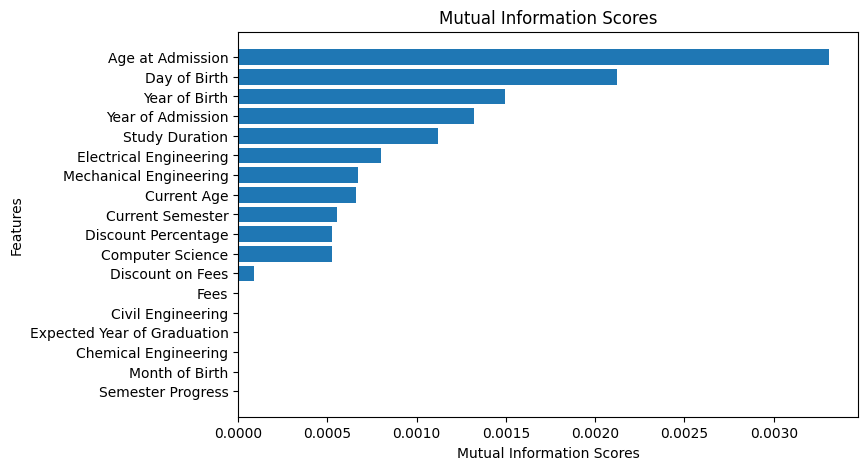

In [53]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)

  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")
  plt.xlabel("Mutual Information Scores")
  plt.ylabel("Features")
  plt.show()


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores_df["MI Score"])

In [54]:
X_f.drop(['Mechanical Engineering', 'Age at Admission', 'Civil Engineering',
          'Electrical Engineering', 'Computer Science', 'Chemical Engineering',
          'Discount on Fees', 'Fees', 'Semester Progress'], axis=1, inplace=True)
X_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114353 entries, 2 to 199999
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year of Admission            114353 non-null  int64  
 1   Expected Year of Graduation  114353 non-null  int64  
 2   Current Semester             114353 non-null  int64  
 3   Year of Birth                114353 non-null  int32  
 4   Month of Birth               114353 non-null  int32  
 5   Day of Birth                 114353 non-null  int32  
 6   Study Duration               114353 non-null  int64  
 7   Current Age                  114353 non-null  int32  
 8   Discount Percentage          114353 non-null  float64
dtypes: float64(1), int32(4), int64(4)
memory usage: 7.0 MB


In [55]:
X_train, X_temp, y_train, y_temp = train_test_split(X_f, y_f, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [56]:
X_train.head()

,Year of Admission,Expected Year of Graduation,Current Semester,Year of Birth,Month of Birth,Day of Birth,Study Duration,Current Age,Discount Percentage
176277,2021,2022,2,1998,11,2,1,26,12.557623
58962,2020,2021,2,2000,1,9,1,24,2.432153
103275,2016,2018,1,1998,9,18,2,26,13.842613
190123,2020,2023,2,2002,8,6,3,22,12.412582
53133,2018,2020,2,2006,4,20,2,18,0.183968


In [57]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [58]:
X_train_scaled

array([[ 1.73218815e+00,  5.80844826e-01, -4.44762681e-01, ...,
        -1.15295983e+00,  1.30392365e+00,  4.44658228e-01],
       [ 1.15498198e+00,  5.23497410e-03, -4.44762681e-01, ...,
        -1.15295983e+00,  5.41674358e-01, -1.30651545e+00],
       [-1.15384267e+00, -1.72159458e+00, -1.34018316e+00, ...,
        -5.74133431e-01,  1.30392365e+00,  6.66893865e-01],
       ...,
       [-1.15384267e+00, -2.29720443e+00,  4.50657800e-01, ...,
        -1.15295983e+00,  9.22799002e-01,  1.72775337e+00],
       [ 1.15498198e+00,  5.80844826e-01,  1.34607828e+00, ...,
        -5.74133431e-01,  5.41674358e-01,  2.81368805e-01],
       [ 5.69656414e-04, -5.70374878e-01, -1.34018316e+00, ...,
        -5.74133431e-01,  1.60549714e-01,  1.81456346e-01]])

In [59]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
y_pred_dt=dt.predict(X_test_scaled)

In [61]:
accur = accuracy_score(y_test, y_pred_dt)
print('Accuracy score:', accur)

cv_scores_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print("Decision Tree Mean Cross-validation scores: ", cv_scores_dt.mean())

Accuracy score: 0.20072290561417827
Decision Tree Mean Cross-validation scores:  0.2005946943726103


# **HyperParametr Tuning**

In [62]:
param_grid ={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2']
}

In [63]:
grid_search = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=42),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

In [64]:
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [65]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [66]:
accur = accuracy_score(y_test, y_pred)
print('Accuracy score:', accur)

cv_scores_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print("Decision Tree Mean Cross-validation scores: ", cv_scores_dt.mean())


Accuracy score: 0.1996735264968227
Decision Tree Mean Cross-validation scores:  0.2005946943726103


# Summary

In [ ]:
#Standard
Accuracy score: 0.2025
Decision Tree Mean Cross-validation scores:  0.20188571428571428

In [ ]:
# Scaling
Accuracy score: 0.20296666666666666
Decision Tree Mean Cross-validation scores:  0.2021


In [ ]:
# Feature engineering
Accuracy score: 0.20072290561417827
Decision Tree Mean Cross-validation scores:  0.2005946943726103

In [ ]:
#HyperParametr Tuning
Accuracy score: 0.1996735264968227
Decision Tree Mean Cross-validation scores:  0.2005946943726103